## 1. Import Datos

In [150]:
#Paquetes necesarios
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [152]:
#Import datos

stations_2017 = pd.read_csv('Data_Stations/Stations_2017.csv', sep = ',', low_memory = False)
stations_2016 = pd.read_csv('Data_Stations/Stations_2016.csv', sep = ',',low_memory = False)
stations_2015 = pd.read_csv('Data_Stations/Stations_2015.csv', sep = ',',low_memory = False)
stations_2014 = pd.read_csv('Data_Stations/Stations_2014.csv', sep = ',',low_memory = False)

od_2017 = pd.read_csv('Data_OD/OD_2017.csv', sep = ',',low_memory = False)
od_2016 = pd.read_csv('Data_OD/OD_2016.csv', sep = ',',low_memory = False)
od_2015 = pd.read_csv('Data_OD/OD_2015.csv', sep = ',',low_memory = False)
od_2014 = pd.read_csv('Data_OD/OD_2014.csv', sep = ',',low_memory = False)


In [149]:
with open('Data_Stations/stations.json') as status_stations:
    status_stations = json.load(status_stations)

In [4]:
type(status_stations)

dict

In [5]:
status_stations

{'stations': [{'id': 1,
   's': 'Hôtel-de-Ville 2 (du Champs-de-Mars / Gosford)',
   'n': '6001',
   'st': 1,
   'b': False,
   'su': False,
   'm': False,
   'lu': 1510061994757,
   'lc': 1510070565576,
   'bk': False,
   'bl': False,
   'la': 45.5093281424543,
   'lo': -73.55434656143188,
   'da': 0,
   'dx': 0,
   'ba': 15,
   'bx': 0},
  {'id': 2,
   's': 'Ste-Catherine / Dézéry',
   'n': '6002',
   'st': 1,
   'b': False,
   'su': False,
   'm': False,
   'lu': 1510065732418,
   'lc': 1510070446412,
   'bk': False,
   'bl': False,
   'la': 45.53929155936048,
   'lo': -73.54103073477745,
   'da': 11,
   'dx': 0,
   'ba': 12,
   'bx': 0},
  {'id': 3,
   's': 'Clark / Evans',
   'n': '6003',
   'st': 1,
   'b': False,
   'su': False,
   'm': False,
   'lu': 1510069557891,
   'lc': 1510070398986,
   'bk': False,
   'bl': False,
   'la': 45.51113228073946,
   'lo': -73.56790713965893,
   'da': 11,
   'dx': 0,
   'ba': 8,
   'bx': 0},
  {'id': 4,
   's': 'Hôtel-de-Ville (du Champs-de-Ma

In [6]:
stations_data = json_normalize(data=status_stations['stations'], 
                            meta=['id', 's','n', 'st','b','su','m','lu','lc','bk','bl','la','lo','da','dx','ba','bx'])

In [7]:
type(stations_data)

pandas.core.frame.DataFrame

In [8]:
stations_2017.shape

(546, 5)

In [9]:
stations_2016.shape

(465, 4)

In [10]:
#Parece que no tienen las mismas columnas. 2017 tiene una de más
stations_2015.shape

(460, 4)

In [11]:
stations_2014.shape

(459, 4)

In [12]:
stations_2017.head()

,code,name,latitude,longitude,is_public
0,7060,de l'Église / de Verdun,45.463001,-73.571569,1
1,6173,Berri / Cherrier,45.519088,-73.569509,1
2,6203,Hutchison / Sherbrooke,45.507810,-73.572080,1
3,6204,Milton / Durocher,45.508144,-73.574772,1
4,6104,Wolfe / René-Lévesque,45.516818,-73.554188,1


In [13]:
type(stations_2017)

pandas.core.frame.DataFrame

In [14]:
#En 2017, tengo que quitar la columna extra para poder unir los cuatro datasets
stations_2017.drop(['is_public',], axis='columns', inplace=True)

In [15]:
type(stations_2017)

pandas.core.frame.DataFrame

In [16]:
#Antes de unir los cuatro datasets voy a crear una columna en cada uno con el año, así, si ha cambiado algo en
#alguna estación de un año a otro, se mantiene el histórico y los puedo diferenciar
stations_2017['year']= 2017
stations_2016['year']= 2016
stations_2015['year']= 2015
stations_2014['year']= 2014

In [17]:
##Hago lo mismo con OD
od_2017.shape

(4018722, 7)

In [18]:
od_2017.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1
1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1
2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1
3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1
4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1


In [19]:
od_2016.shape

(4000080, 7)

In [20]:
od_2016.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2016-04-15 00:00,6315,2016-04-15 00:05,6315,349,1
1,1,2016-04-15 00:00,6019,2016-04-15 00:29,6347,1720,1
2,2,2016-04-15 00:00,6219,2016-04-15 00:05,6219,284,1
3,3,2016-04-15 00:03,6211,2016-04-15 00:07,6307,238,1
4,4,2016-04-15 00:04,6312,2016-04-15 00:19,6312,910,1


In [21]:
od_2015.shape

(3443883, 7)

In [22]:
od_2015.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2015-04-15 00:00,6164,2015-04-15 00:14,6216,866,1
1,1,2015-04-15 00:00,6192,2015-04-15 00:06,6158,388,1
2,2,2015-04-15 00:01,6140,2015-04-15 00:22,6040,1229,1
3,3,2015-04-15 00:02,6140,2015-04-15 00:22,6040,1200,0
4,4,2015-04-15 00:02,6209,2015-04-15 00:09,6003,414,1


In [23]:
od_2014.shape

(3136276, 7)

In [24]:
od_2014.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2014-04-15 00:01,6209,2014-04-15 00:18,6436,1061,1
1,1,2014-04-15 00:01,6214,2014-04-15 00:11,6248,615,1
2,2,2014-04-15 00:01,6164,2014-04-15 00:18,6216,1031,1
3,3,2014-04-15 00:01,6214,2014-04-15 00:24,6082,1382,1
4,4,2014-04-15 00:02,6149,2014-04-15 00:08,6265,347,1


#### Unión de datasets en 2: OD y Stations

In [25]:
stations = pd.concat([stations_2017, stations_2016, stations_2015, stations_2014])

In [26]:
stations.head()

,code,name,latitude,longitude,year
0,7060,de l'Église / de Verdun,45.463001,-73.571569,2017
1,6173,Berri / Cherrier,45.519088,-73.569509,2017
2,6203,Hutchison / Sherbrooke,45.507810,-73.572080,2017
3,6204,Milton / Durocher,45.508144,-73.574772,2017
4,6104,Wolfe / René-Lévesque,45.516818,-73.554188,2017


In [27]:
stations.shape

(1930, 5)

In [28]:
##Como stations aporta información sobre las estaciones, voy a unirlo a OD para tener el dataset completo (con nombres
##de las estaciones)
##Para ello voy a usar las columnas station code y la fecha, extrayendo el año
od = pd.concat([od_2017, od_2016,od_2015, od_2014])

In [29]:
od['start_date'] = od['start_date'].astype('datetime64')
od['end_date'] = od['end_date'].astype('datetime64')

#Aquí utilizo start date porque el año es lo único relevante en este caso
import datetime as dt
od['year_od'] = pd.DatetimeIndex(od['start_date']).year 

In [30]:
od.shape

(14598961, 8)

In [31]:
od.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,year_od
0,0,2017-04-15 00:00:00,7060,2017-04-15 00:31:00,7060,1841,1,2017
1,1,2017-04-15 00:01:00,6173,2017-04-15 00:10:00,6173,553,1,2017
2,2,2017-04-15 00:01:00,6203,2017-04-15 00:04:00,6204,195,1,2017
3,3,2017-04-15 00:01:00,6104,2017-04-15 00:06:00,6114,285,1,2017
4,4,2017-04-15 00:01:00,6174,2017-04-15 00:11:00,6174,569,1,2017


In [32]:
datos = pd.merge(od, stations,how = 'left', left_on=['start_station_code','year_od'], right_on=['code','year'])

In [33]:
print(datos.shape)

(14598961, 13)


In [34]:
print(datos.columns)

Index(['Unnamed: 0', 'start_date', 'start_station_code', 'end_date',
       'end_station_code', 'duration_sec', 'is_member', 'year_od', 'code',
       'name', 'latitude', 'longitude', 'year'],
      dtype='object')


In [35]:
##Quito las columnas que no me interesan ya
datos.drop(['Unnamed: 0','start_station_code','code','year',], axis='columns', inplace=True)

In [36]:
##Renombro columnas para no confundirlas en el siguiente join
datos.columns = ['start_date','end_date','end_station_code','duration_sec','is_member','year','start_station',
                'latitude_start_station','longitude_start_station',]

In [37]:
datos.head()

,start_date,end_date,end_station_code,duration_sec,is_member,year,start_station,latitude_start_station,longitude_start_station
0,2017-04-15 00:00:00,2017-04-15 00:31:00,7060,1841,1,2017,de l'Église / de Verdun,45.463001,-73.571569
1,2017-04-15 00:01:00,2017-04-15 00:10:00,6173,553,1,2017,Berri / Cherrier,45.519088,-73.569509
2,2017-04-15 00:01:00,2017-04-15 00:04:00,6204,195,1,2017,Hutchison / Sherbrooke,45.507810,-73.572080
3,2017-04-15 00:01:00,2017-04-15 00:06:00,6114,285,1,2017,Wolfe / René-Lévesque,45.516818,-73.554188
4,2017-04-15 00:01:00,2017-04-15 00:11:00,6174,569,1,2017,Roy / St-Denis,45.519080,-73.572700


In [38]:
##Ahora lo mismo para tener también el nombre de las estaciones de destino
datos = pd.merge(datos, stations, how = 'left', left_on=['end_station_code','year'], right_on=['code','year'])

In [39]:
print(datos.shape)

(14598961, 13)


In [40]:
datos.drop(['end_station_code','code',], axis='columns', inplace=True)

In [41]:
datos.columns = ['start_date','end_date','duration_sec','is_member','year','start_station',
                'latitude_start_station','longitude_start_station','end_station','latitude_end_station',
                'longitude_end_station']

## Análisis Exploratorio de Datos

In [42]:
print(datos.isnull().sum())

start_date                       0
end_date                         0
duration_sec                     0
is_member                        0
year                             0
start_station                    0
latitude_start_station           0
longitude_start_station          0
end_station                4018722
latitude_end_station       4018722
longitude_end_station      4018722
dtype: int64


In [43]:
##Aquí hay algunos valores nulos, los de 2017, porque no encuentra match al hacer merge. Debe de haber algún problema
##con los datos.

In [44]:
stations_2017.head()

,code,name,latitude,longitude,year
0,7060,de l'Église / de Verdun,45.463001,-73.571569,2017
1,6173,Berri / Cherrier,45.519088,-73.569509,2017
2,6203,Hutchison / Sherbrooke,45.507810,-73.572080,2017
3,6204,Milton / Durocher,45.508144,-73.574772,2017
4,6104,Wolfe / René-Lévesque,45.516818,-73.554188,2017


In [45]:
od_2017.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1
1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1
2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1
3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1
4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1


In [46]:
print(od_2017['end_station_code'][0] == stations_2017['code'][0])
#Efectivamente, no es lo mismo. 

False


In [47]:
print(stations_2017['code'][0] == 7060)

True


In [48]:
print(od_2017['end_station_code'][0] == '7060')

True


In [49]:
##end_station_code es del tipo string, mientras que code es numérica. No me deja cambiar a numérica directamente
##por el siguiente error: ValueError: invalid literal for int() with base 10: 'Tabletop (RMA)'. Debe haber algún valor
##con caracteres que no sean números.

In [50]:
od_2017['end_station_code'] = od_2017['end_station_code'].str.replace(r'[^0-9]+', '')

In [51]:
od_2017['end_station_code'].value_counts()

6015    52989
6100    48546
6012    42432
6078    42190
6026    37636
        ...  
5005      562
5002      436
5004      382
5003      365
            1
Name: end_station_code, Length: 547, dtype: int64

In [52]:
#Ahora, convertir a numérica la columna end_station_code. Da error, porque debe haber alguna fila en blanco.
od_2017['end_station_code'] = od_2017['end_station_code'].replace('', None)

In [53]:
od_2017['end_station_code'] = od_2017['end_station_code'].astype('int')

In [54]:
print(od_2017['end_station_code'][0])

7060


In [55]:
print(od_2017['end_station_code'][0] == 7060)

True


In [56]:
##Ahora vuelvo a repetir los joins para tener todos los datos
od = pd.concat([od_2017, od_2016,od_2015, od_2014])

In [57]:
od['start_date'] = od['start_date'].astype('datetime64')
od['end_date'] = od['end_date'].astype('datetime64')

#Aquí utilizo start date porque el año es lo único relevante en este caso
import datetime as dt
od['year_od'] = pd.DatetimeIndex(od['start_date']).year 

In [58]:
datos = pd.merge(od, stations,how = 'left', left_on=['start_station_code','year_od'], right_on=['code','year'])

In [59]:
datos.drop(['Unnamed: 0','start_station_code','code','year',], axis='columns', inplace=True)

In [60]:
datos.columns = ['start_date','end_date','end_station_code','duration_sec','is_member','year','start_station',
                'latitude_start_station','longitude_start_station',]

In [61]:
##Ahora lo mismo para tener también el nombre de las estaciones de destino
datos = pd.merge(datos, stations, how = 'left', left_on=['end_station_code','year'], right_on=['code','year'])

In [62]:
datos.drop(['end_station_code','code',], axis='columns', inplace=True)

In [63]:
datos.columns = ['start_date','end_date','duration_sec','is_member','year','start_station',
                'latitude_start_station','longitude_start_station','end_station','latitude_end_station',
                'longitude_end_station']

In [64]:
print(datos.isnull().sum())

start_date                 0
end_date                   0
duration_sec               0
is_member                  0
year                       0
start_station              0
latitude_start_station     0
longitude_start_station    0
end_station                0
latitude_end_station       0
longitude_end_station      0
dtype: int64


#### ¿Cuáles son las estaciones más utilizadas?

In [65]:
##Para sacar las estaciones más utilizadas hay que ver la frecuencia con la que aparece cada valor de nombre de
##estación, tanto como inicio de viaje como fin
y_start = datos['start_station'].value_counts().nlargest(5)
y_start = y_start.to_frame()
y_start = y_start.reset_index()
y_start.columns = ['start_station','count']

In [66]:
y_end = datos['end_station'].value_counts().nlargest(5)
y_end = y_end.to_frame()
y_end = y_end.reset_index()
y_end.columns = ['end_station','count']

Text(0.5, 1.0, 'Estaciones más usadas como inicio de trayecto')

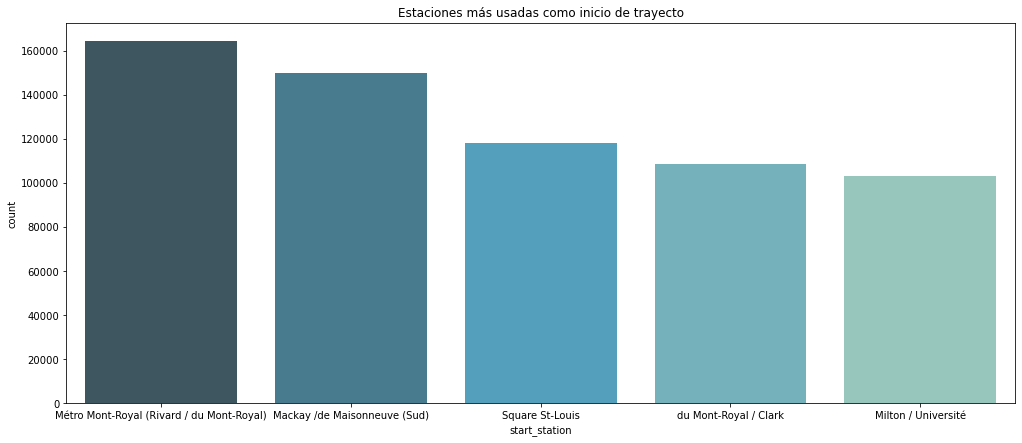

In [67]:
plt.figure(figsize=(17, 7))
ax = sns.barplot(x='start_station', y='count', data=y_start,palette = 'GnBu_d')
ax.set_title('Estaciones más usadas como inicio de trayecto')

Text(0.5, 1.0, 'Estaciones más usadas como fin de trayecto')

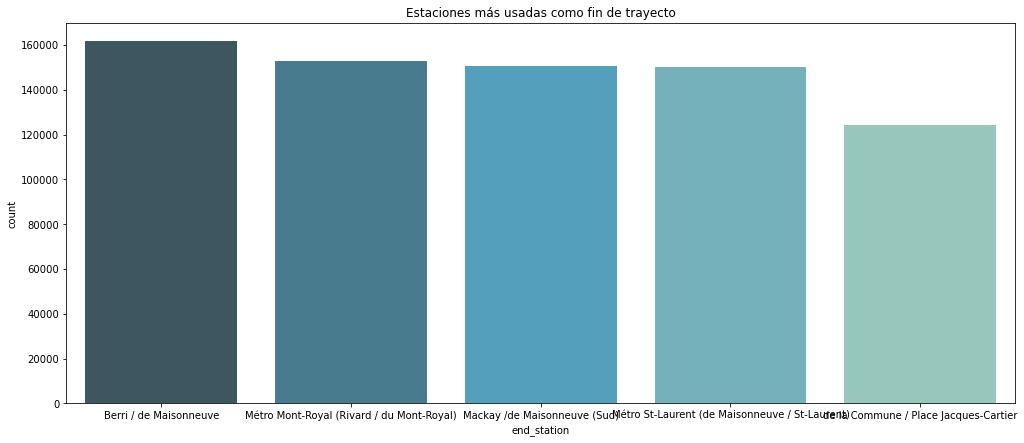

In [68]:
plt.figure(figsize=(17, 7))
ax = sns.barplot(x='end_station', y='count', data=y_end, palette = 'GnBu_d')
ax.set_title('Estaciones más usadas como fin de trayecto')

#### ¿Cuáles son las rutas más frecuentes?

In [69]:
rutas = datos.filter(['start_station','end_station'], axis=1)

In [70]:
rutas = rutas.groupby(['start_station', 'end_station']).size().unstack(fill_value = 0)

Text(0.5, 1.0, 'Rutas más frecuentes')

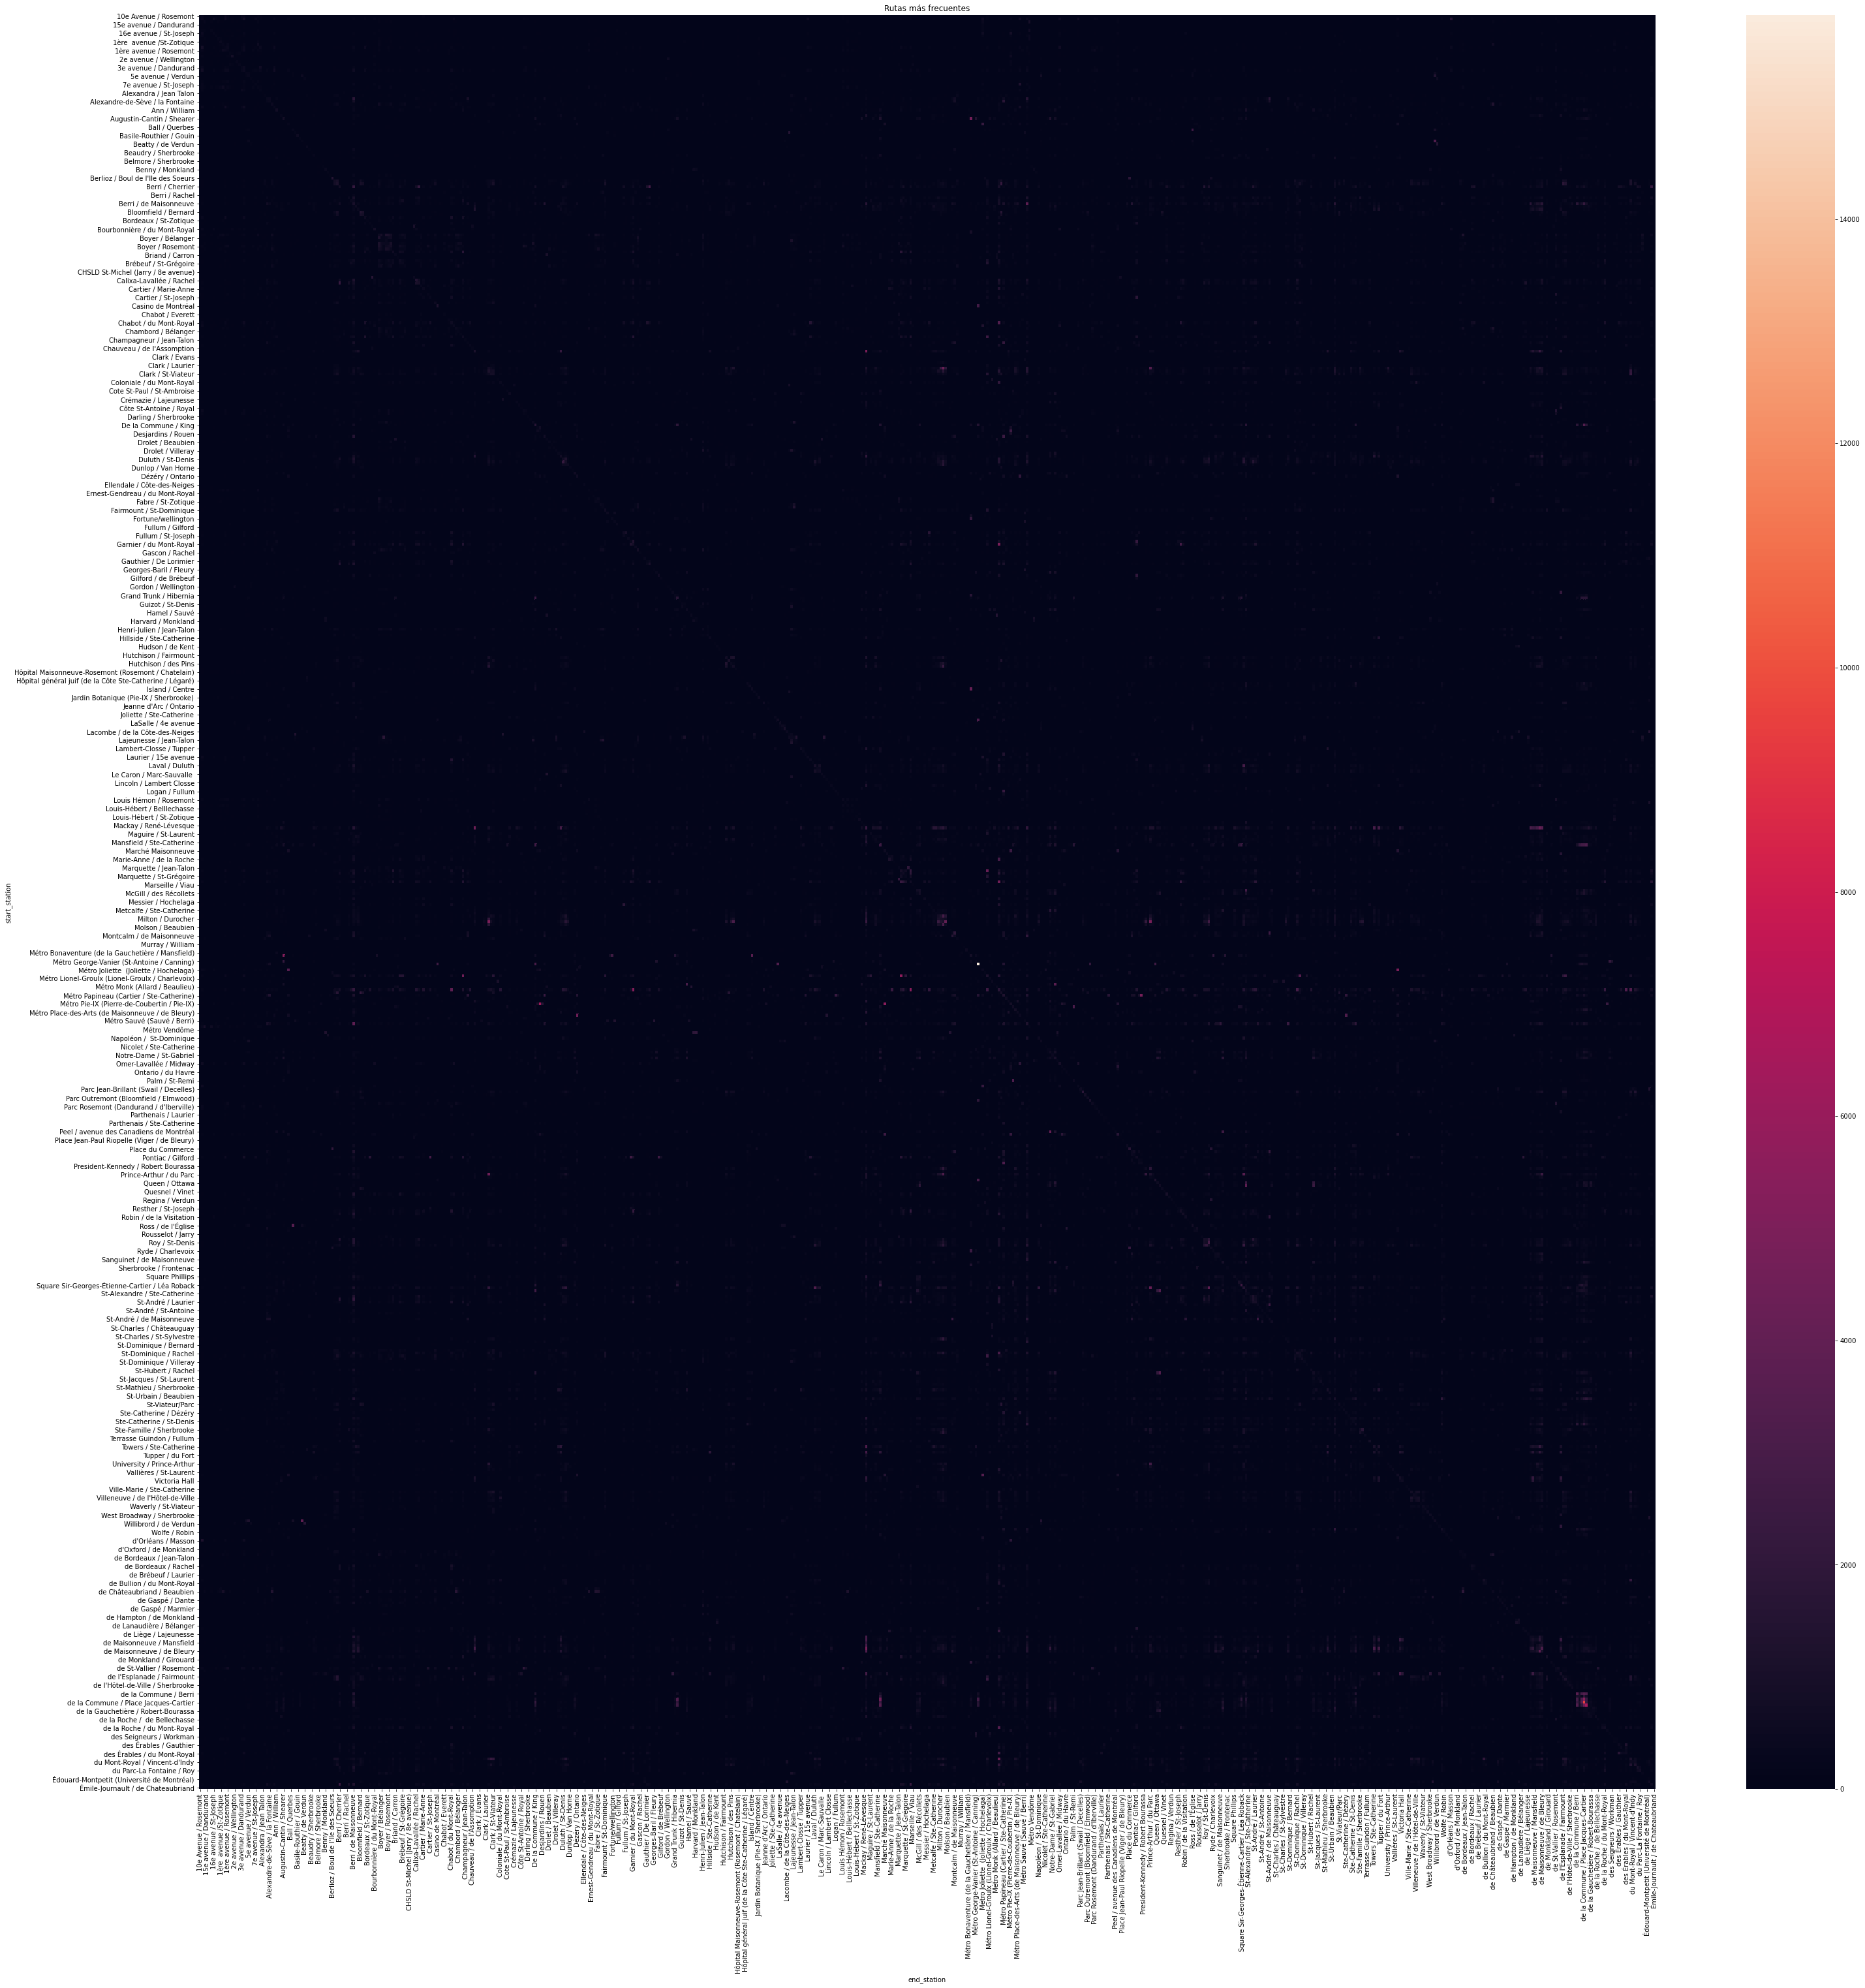

In [71]:
plt.figure(figsize=(50, 50))
ax = sns.heatmap(rutas)
ax.set_title('Rutas más frecuentes')

In [72]:
##Hay tantos valores que no se aprecia.
rutas.abs().stack().nlargest(5).rename('value').rename_axis(['start_station', 'end_station']).reset_index()


,start_station,end_station,value
0,Métro Jean-Drapeau,Métro Jean-Drapeau,15818
1,de la Commune / Place Jacques-Cartier,de la Commune / Place Jacques-Cartier,9570
2,de la Commune / St-Sulpice,de la Commune / St-Sulpice,6451
3,Métro Pie-IX (Pierre-de-Coubertin / Pie-IX),Desjardins / Ontario,6199
4,Métro Laurier (Rivard / Laurier),Marquette / Laurier,5567


In [73]:
datos_rutas = datos.loc[(datos['start_station']=='Métro Jean-Drapeau')]
datos_rutas = datos_rutas.loc[(datos_rutas['end_station']=='Métro Jean-Drapeau')]

In [74]:
datos_rutas.shape

(15818, 11)

In [75]:
#Es muy curioso que las tres rutas más frecuentes sean circulares.
datos_rutas['is_member'].value_counts()

0    13557
1     2261
Name: is_member, dtype: int64

In [76]:
#La mayoría son no miembros, lo que explicaría que la rutas fueran circulares (seguramente usen el sistema para
#hacer turismo, volviendo al punto de inicio de la ruta)

#### ¿Existe algún patrón de uso?

In [77]:
#Patrón de uso por días del mes, semana, meses, años...
datos['month'] = pd.DatetimeIndex(datos['start_date']).month
datos['day_om'] = pd.DatetimeIndex(datos['start_date']).day
datos['day_ow'] = pd.DatetimeIndex(datos['start_date']).dayofweek
datos['hour_od'] = pd.DatetimeIndex(datos['start_date']).hour

In [78]:
uso_anyos = datos['year'].value_counts()
uso_anyos = uso_anyos.to_frame()
uso_anyos = uso_anyos.reset_index()
uso_anyos.columns = ['year','count']

Text(0.5, 1.0, 'Trayectos totales por año')

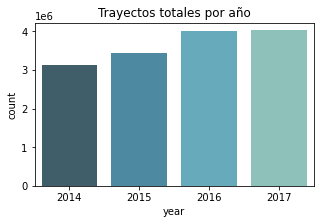

In [79]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='year', y='count', data=uso_anyos, palette = 'GnBu_d')
ax.set_title('Trayectos totales por año')
#El total de viajes iniciados aumenta cada año

In [80]:
uso_meses = datos['month'].value_counts()
uso_meses = uso_meses.to_frame()
uso_meses = uso_meses.reset_index()
uso_meses.columns = ['month','count']

Text(0.5, 1.0, 'Trayectos totales por mes')

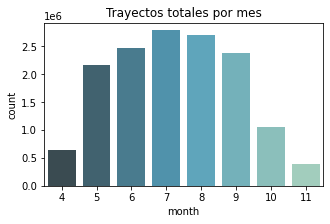

In [81]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='month', y='count', data=uso_meses, palette = 'GnBu_d')
ax.set_title('Trayectos totales por mes')
#En los meses de verano se utiliza más el servicio

In [82]:
uso_dias_semana = datos['day_ow'].value_counts()
uso_dias_semana = uso_dias_semana.to_frame()
uso_dias_semana = uso_dias_semana.reset_index()
uso_dias_semana.columns = ['day_ow','count']

Text(0.5, 1.0, 'Trayectos totales por día de la semana')

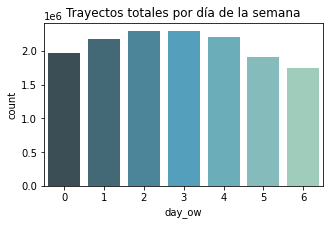

In [83]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='day_ow', y='count', data=uso_dias_semana, palette = 'GnBu_d')
ax.set_title('Trayectos totales por día de la semana')
#Entre semana también se ve que se utiliza más

In [84]:
uso_dias = datos['day_om'].value_counts()
uso_dias = uso_dias.to_frame()
uso_dias = uso_dias.reset_index()
uso_dias.columns = ['day_om','count']

Text(0.5, 1.0, 'Trayectos totales por día del mes')

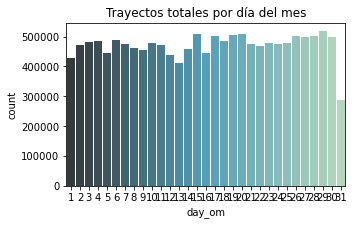

In [85]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='day_om', y='count', data=uso_dias, palette = 'GnBu_d')
ax.set_title('Trayectos totales por día del mes')
#En este caso no hay tanta diferencia, excepto los días 31 pero porque el 31 no está en todos los meses

In [86]:
uso_horas = datos['hour_od'].value_counts()
uso_horas = uso_horas.to_frame()
uso_horas = uso_horas.reset_index()
uso_horas.columns = ['hour','count']

Text(0.5, 1.0, 'Trayectos totales por hora del día')

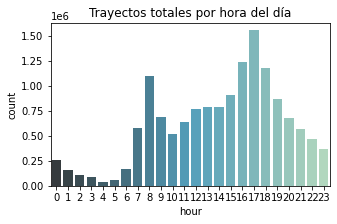

In [87]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='hour', y='count', data=uso_horas, palette = 'GnBu_d')
ax.set_title('Trayectos totales por hora del día')
#Los picos coinciden con las horas de entrada al trabajo/universidad

In [88]:
##Patrón de uso por duración, cruzando con los datos de hora y fecha
duration_df = datos.filter(['duration_sec','month'], axis=1)

In [89]:
duration_mean = duration_df['duration_sec'].groupby(duration_df['month']).mean() 

In [90]:
duration_mean = duration_mean.to_frame()
duration_mean = duration_mean.reset_index()
duration_mean.columns = ['month','duration_mean']

In [91]:
duration_mean['duration_mean'] = duration_mean['duration_mean'] / 60

Text(0.5, 1.0, 'Duración media del traeyecto por mes')

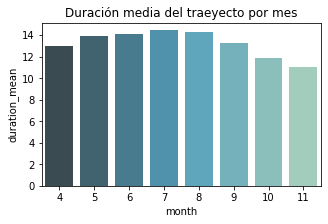

In [92]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='month', y='duration_mean', data=duration_mean, palette = 'GnBu_d')
ax.set_title('Duración media del traeyecto por mes')
#Un poco más larga en los meses de verano. Igual para disfrutar más el paseo

In [93]:
#Replico lo mismo para los días de la semana
duration_df = datos.filter(['duration_sec','day_ow'], axis=1)
duration_mean = duration_df['duration_sec'].groupby(duration_df['day_ow']).mean()
duration_mean = duration_mean.to_frame()
duration_mean = duration_mean.reset_index()
duration_mean.columns = ['day_ow','duration_mean']
duration_mean['duration_mean'] = duration_mean['duration_mean'] / 60

Text(0.5, 1.0, 'Duración media del trayecto por día de la semana')

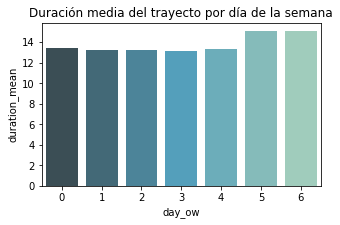

In [94]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='day_ow', y='duration_mean', data=duration_mean, palette = 'GnBu_d')
ax.set_title('Duración media del trayecto por día de la semana')
#Un poco más largos los trayectos los fines de semana.

#### Ubicación: ¿Qué zonas están peor cubiertas?

In [95]:
mapa = stations.filter(['latitude','longitude'], axis=1)
#Ahora saco los valores maximos de latitud y longitud para exportar un mapa sobre el cual pintar los datos

In [96]:
print(mapa['longitude'].min())

-73.67063373327254


In [97]:
print(mapa['longitude'].max())

-73.49506705999373


In [98]:
print(mapa['latitude'].min())

45.430740224174976


In [99]:
print(mapa['latitude'].max())

45.58275715603393


In [100]:
imagen = plt.imread('map.png')

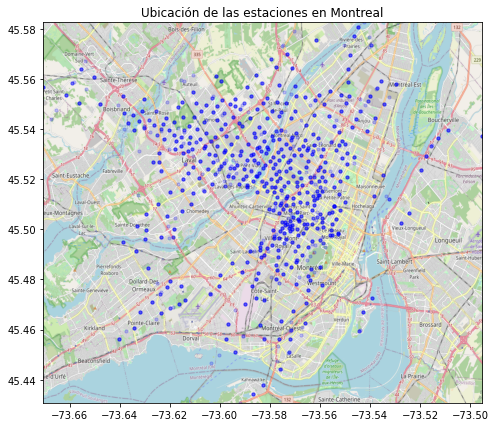

In [101]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(mapa['longitude'], mapa['latitude'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Ubicación de las estaciones en Montreal')
ax.set_xlim(mapa['longitude'].min(),mapa['longitude'].max())
ax.set_ylim(mapa['latitude'].min(),mapa['latitude'].max())
ax.imshow(imagen, zorder=0, extent = (mapa['longitude'].min(),mapa['longitude'].max(),
                                      mapa['latitude'].min(),mapa['latitude'].max()), aspect= 'equal')

Por lo que se puede observar en el mapa, hay zonas con más estaciones que otras. Por ejemplo, la zona entre Chomedey
y Saint-Laurent, Fabreville, Laval-Ouest son zonas con pocas estaciones. En general, el suroeste de la ciudad está
peor cubierto que el noreste.

#### ¿Hay diferencias de uso entre subscribers y non-subscribers?

In [102]:
subs_duration = datos.filter(['duration_sec','is_member'],axis = 1)
subs_duration['is_member'] = subs_duration['is_member'].map({1:'member',0:'not member'})

In [103]:
x1 = list(subs_duration[subs_duration['is_member'] == 'member']['duration_sec'])
x2 = list(subs_duration[subs_duration['is_member'] == 'not member']['duration_sec'])

Text(0, 0.5, 'Densidad')

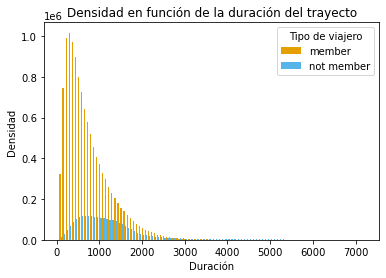

In [104]:
colors = ['#E69F00', '#56B4E9']
names = ['member','not member']
plt.hist([x1, x2], bins = 100, color = colors, label=names)
plt.legend(prop={'size': 10}, title = 'Tipo de viajero')
plt.title('Densidad en función de la duración del trayecto')
plt.xlabel('Duración')
plt.ylabel('Densidad')


No parece haber mucha diferencia de comportamiento entre miembros y no miembros en cuanto a duración del trayecto.

In [105]:
##Además, de la duración, puede ser interesante ver si hay diferencias de uso por día de la semana, mes, año, hora... 
##Voy a replicar el código anterior de mes, año etc pero con la diferencia entre miembro y no miembro
uso_meses_member = datos.filter(['month','is_member'],axis = 1)
uso_meses_member['is_member'] = uso_meses_member['is_member'].map({1:'member',0:'not member'})
uso_meses_member = uso_meses_member.groupby(['month']).is_member.value_counts()
uso_meses_member = uso_meses_member.unstack()

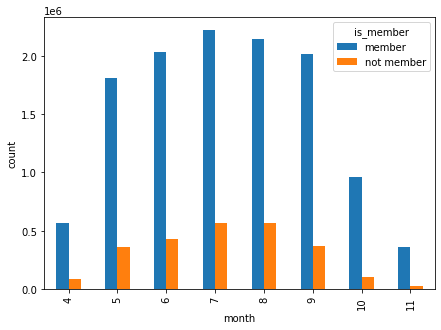

In [106]:
uso_meses_member.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

In [107]:
uso_member = datos.filter(['day_ow','is_member'],axis = 1)
uso_member['is_member'] = uso_member['is_member'].map({1:'member',0:'not member'})
uso_member = uso_member.groupby(['day_ow']).is_member.value_counts()
uso_member = uso_member.unstack()

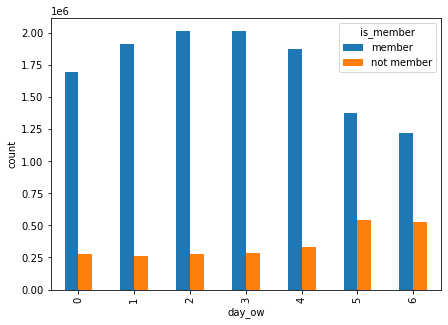

In [108]:
uso_member.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()
#En este caso si parece que los miembros lo usan más entre semana que los no miembros, que lo usan relativamente más
#los findes

In [109]:
uso_member = datos.filter(['hour_od','is_member'],axis = 1)
uso_member['is_member'] = uso_member['is_member'].map({1:'member',0:'not member'})
uso_member = uso_member.groupby(['hour_od']).is_member.value_counts()
uso_member = uso_member.unstack()

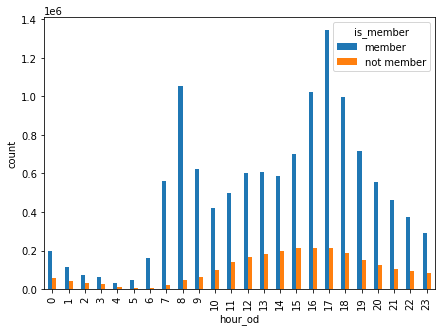

In [110]:
uso_member.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()
#Aquí igual, los picos de uso para miembros es a primera hora de la mañana y ppr la tarde mientras que para los no
#miembros sería más entre las 2 y las 5.

Parece que la diferencia de comportamiento entre subscribers y non subscribers es que los primeros las utilizan más entre semana y en horas punta de desplazamientos al trabajo y universidades, mientras que los no miembros las utilizan más los fines de semana y a mediodía. Esto podría ser porque los no miembros pueden ser turistas que no van a utilizar el servicio muchas veces y a los que no les sale rentable hacerse miembros. Por el contrario, aquellos que utilizan la bici como alternativa para desplazarse al trabajo, probablemente obtengas ventajas al hacerse miembros y por eso vemos estas diferencias en el patrón de uso.

#### ¿La ampliación del número de estaciones ha afectado al uso de las mismas? ¿Cómo?

In [111]:
#Primero saco el número de estaciones por año
stations_growth = stations['year'].value_counts()
stations_growth = stations_growth.to_frame()
stations_growth = stations_growth.reset_index()
stations_growth.columns = ['year','count_stations']

In [112]:
#Ahora saco el número de trayectos por año (lo rescato del análisis de patrones anterior)
uso_anyos.head()

,year,count
0,2017,4018722
1,2016,4000080
2,2015,3443883
3,2014,3136276


In [113]:
stations_growth_uso = pd.merge(uso_anyos, stations_growth, how = 'left', left_on=['year'], right_on=['year'])

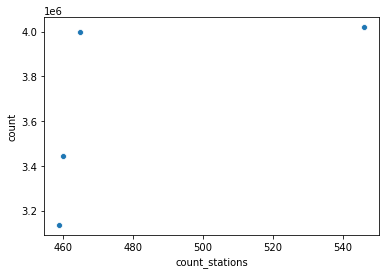

In [114]:
#Buscamos visualmente una relación entre el número de estaciones y el uso
ax = sns.scatterplot(x="count_stations", y="count", data=stations_growth_uso)

Hay muy pocos datos para ver si puede tener relación. Pruebo a ver la correlación.

In [115]:
stations_growth_uso['count_stations'].corr(stations_growth_uso['count'])

0.6157196621042462

In [116]:
#Al ser algo tan sencillo, probamos una regresión lineal
from sklearn.linear_model import LinearRegression
x = stations_growth_uso.filter(['count_stations'], axis=1)
y = stations_growth_uso.filter(['count'], axis=1)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [117]:
print ('beta_0', model.intercept_[0])
print ('beta_1', model.coef_[0][0])
print ('R^2', model.score(x, y))

beta_0 610303.7364276457
beta_1 6299.350287196589
R^2 0.3791107023017668


Hay algo de correlación entre las dos variables, aunque según el modelo el aumento de estaciones no explica en su totalidad el aumento de trayectos. Es posible que al haber más estaciones haya más bicis disponibles pero tampoco se puede afirmar que el aumento en trayectos sea únicamente por el aumento en estaciones. En cualquier caso, no hay suficientes datos disponibles.

### Exploración dataset estaciones

In [118]:
stations_data.head()

,id,s,n,st,b,su,m,lu,lc,bk,bl,la,lo,da,dx,ba,bx
0,1,Hôtel-de-Ville 2 (du Champs-de-Mars / Gosford),6001,1,False,False,False,1510061994757,1510070565576,False,False,45.509328,-73.554347,0,0,15,0
1,2,Ste-Catherine / Dézéry,6002,1,False,False,False,1510065732418,1510070446412,False,False,45.539292,-73.541031,11,0,12,0
2,3,Clark / Evans,6003,1,False,False,False,1510069557891,1510070398986,False,False,45.511132,-73.567907,11,0,8,0
3,4,Hôtel-de-Ville (du Champs-de-Mars / Gosford),6004,1,False,False,False,1510069651843,1510070613361,False,False,45.509188,-73.554580,9,0,26,0
4,6,18e avenue / Rosemont,6006,1,False,False,False,1510062707620,1510070500075,False,False,45.557895,-73.576529,9,0,14,0


In [119]:
stations_data.shape

(519, 17)

In [120]:
#Parece que todas las estaciones estaban activas en el momento de recopilar esta información
stations_data['st'].value_counts()

1    519
Name: st, dtype: int64

In [121]:
#Ninguna estación bloqueada
stations_data['b'].value_counts()

False    519
Name: b, dtype: int64

In [122]:
#Ninguna suspendida
stations_data['su'].value_counts()

False    519
Name: su, dtype: int64

In [123]:
#En ninguna ponía fuera de servicio
stations_data['m'].value_counts()

False    519
Name: m, dtype: int64

In [124]:
#Recuperamos el timestamp que venía en el archivo json y ajustamos unidades y transformamos a datetime
epoch_time = 1510070614656/1000
dt = dt.datetime.fromtimestamp(epoch_time)

In [125]:
dt

datetime.datetime(2017, 11, 7, 17, 3, 34, 656000)

In [126]:
print(dt)

2017-11-07 17:03:34.656000


Esto implica, que toda la información relativa a las estaciones en este dataset corresponde al 7 de noviembre de 2017.

In [127]:
#Subset con la información de trayectos el día 7 de noviembre de 2017 
data_nov_7 = datos.loc[(datos['year']==2017)]

In [128]:
#No tenemos datos de noviembre
data_nov_7['month'].value_counts()

7    877340
8    859475
6    748080
9    747648
5    589852
4    196327
Name: month, dtype: int64

In [129]:
#Al no tener datos para ese día, lo que se puede hacer es ver si hay un día similar en otros años, otras semanas 
#u otros meses

In [130]:
#¿En otros años había datos de noviembre?
data_2016 = datos.loc[(datos['year']==2016)]
data_2016['month'].value_counts()

7     716335
8     688174
6     645448
9     632218
5     573739
10    397707
4     194514
11    151945
Name: month, dtype: int64

In [131]:
#En 2016 parece que sí. Vamos a filtrar entonces los datos de ese día. (y esa hora, 5 aproximadamente)
data_nov_7_2016 = data_2016.loc[(datos['month']==11)]
data_nov_7_2016 = data_nov_7_2016.loc[(data_nov_7_2016['day_om']==7)]
data_nov_7_2016 = data_nov_7_2016.loc[(data_nov_7_2016['hour_od']==17)]

In [132]:
#Tenemos 1420 trayectos, ese día (el año anterior) y a la misma hora.
data_nov_7_2016.shape

(1420, 15)

In [133]:
#Sacamos el número total de bicis (disponibles + no disponibles) para cada estación (en todas, no solo estas)
stations_data['total_bicis'] = stations_data['ba'] + stations_data['bx']

In [134]:
total_bicis = stations_data.filter(['s','total_bicis'])

In [135]:
total_bicis.columns = ['start_station','total_bicis']

In [136]:
#Ahora que tenemos esto, sacamos el total de salidas por estación
stations_ida = data_nov_7_2016['start_station'].value_counts()
stations_ida = stations_ida.to_frame()
stations_ida = stations_ida.reset_index()
stations_ida.columns = ['station_name','start_trips']

In [137]:
stations_ida = pd.merge(stations_ida, total_bicis,how = 'left', left_on=['station_name'], right_on=['start_station'])

In [138]:
stations_ida = stations_ida.drop(['start_station',], axis=1)

Text(0.5, 1.0, 'Total de inicio de trayectos vs capacidad de bicicletas por estación')

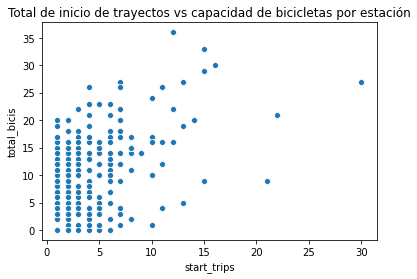

In [139]:
ax = sns.scatterplot(x = 'start_trips', y = 'total_bicis', data=stations_ida)
plt.title('Total de inicio de trayectos vs capacidad de bicicletas por estación')

In [140]:
##Aquí podemos ver que hay ciertas estaciones en las que se esperan pocos inicios de trayecto pero que sin embargo
##tienen muchas bicicletas, y al contrario, otras en las que se esperan muchos inicios de trayecto y en las que hay
#pocas bicicletas (esto contando todas las bicicletas, algunas disponibles y otras en ese momento no)
#A continuación se replica el análisis para las estaciones de destino y los docks/terminales disponibles.

In [141]:
#Saco los docks disponibles
stations_data['total_docks'] = stations_data['da'] + stations_data['dx']
total_docks = stations_data.filter(['s','total_docks'])

In [142]:
#Ahora que tenemos esto, sacamos el total de salidas por estación
stations_vuelta = data_nov_7_2016['end_station'].value_counts()
stations_vuelta = stations_vuelta.to_frame()
stations_vuelta = stations_vuelta.reset_index()
stations_vuelta.columns = ['station_name','end_trips']

In [143]:
stations_vuelta = pd.merge(stations_vuelta, total_docks,how = 'left', left_on=['station_name'], right_on=['s'])

Text(0.5, 1.0, 'Total de final de trayectos vs capacidad de docks por estación')

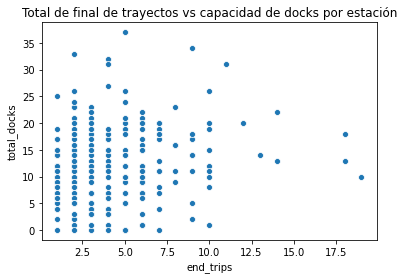

In [144]:
ax = sns.scatterplot(x = 'end_trips', y = 'total_docks', data=stations_vuelta)
plt.title('Total de final de trayectos vs capacidad de docks por estación')

In [145]:
#Aquí ocurre lo mismo, parece que hay muchas estaciones habilitadas para dejar la bicicleta al finalizar el trayecto
#y otras estaciones donde terminarn muchos trayectos con pocos docks habilitados para ello.